In [374]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN




## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [377]:
df = pd.read_csv("C:/Users/ohoud/OneDrive/Desktop/Tuwaiq/Usecase-7/final_data.csv")  

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [380]:
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [383]:
df.shape

(10754, 22)

In [385]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### [[explanation of each column in your dataset:]]

##### player_id: A unique identifier for each player.
##### team: The team the player belongs to.
##### name: The name of the player.
##### position: The playing position of the player (e.g., forward, midfielder, defender).
##### height: The height of the player, likely in meters or centimeters, represented as a float.
##### age: The age of the player, an integer value.
##### appearance: The number of appearances or matches the player has played.
##### goals: The total number of goals the player has scored.
##### assists: The total number of assists provided by the player.
##### yellow cards: The number of yellow cards the player has received.
##### second yellow cards: The number of second yellow cards leading to expulsion (red card).
##### red cards: The total number of red cards received by the player.
##### goals conceded: The number of goals the player has allowed (likely for goalkeepers or defenders).
##### clean sheets: The number of games where the player (usually a goalkeeper or defender) did not allow any goals.
##### minutes played: Total minutes the player has spent on the field in matches.
##### days_injured: Total number of days the player has been injured.
##### games_injured: Total number of games the player missed due to injury.
##### award: Number of awards or distinctions the player has received.
##### current_value: The current market value of the player (likely in a specific currency, such as euros or dollars).
##### highest_value: The highest market value the player has achieved in their career.
##### position_encoded: A numerical encoding of the player's position for analysis or modeling.
##### winger: A binary or categorical variable indicating whether the player is a winger or not (likely coded as 1 for "Yes" and 0 for "No").

## Preprocessing the Data

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### data source publish this data from  players competing in several top-tier global football leagues:
##### 11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.
##### 4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.
##### 1 African league, namely the DStv Premiership in South Africa.
##### 4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### data is not up to date , it is in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### data is consistent and has only one file 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [398]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [401]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [406]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

##### 1. Change the player column into integer by spliting the column and extract only the id number
##### then check its uniqueness and change it to int datatype 
##### then rename the column to player_id

In [409]:
df['player']=df['player'].str.split("/").apply(lambda x : x[4] if len(x) >=4 else  None)

In [411]:
df['player'].nunique()

10754

In [413]:
df['player'].duplicated().sum()

0

In [415]:
df['player']=df['player'].astype(int)

In [417]:
df['player'].dtypes

dtype('int32')

In [419]:
df.rename(columns={"player":"player_id"},inplace =True)

In [421]:
df

player_id                      team                name  \
0          59377         Manchester United        David de Gea   
1         128899         Manchester United        Jack Butland   
2          34130         Manchester United          Tom Heaton   
3         480762         Manchester United   Lisandro Martínez   
4         164770         Manchester United      Raphaël Varane   
...          ...                       ...                 ...   
10749     867763  Western Sydney Wanderers       Aidan Simmons   
10750     708099  Western Sydney Wanderers        Kusini Yengi   
10751    1023268  Western Sydney Wanderers     Nathanael Blair   
10752     703657  Western Sydney Wanderers    Zachary Sapsford   
10753     957230  Western Sydney Wanderers  Alexander Badolato   

                    position      height   age  appearance     goals  \
0                 Goalkeeper  189.000000  32.0         104  0.000000   
1                 Goalkeeper  196.000000  30.0          15  0.000000   
2                 Goalkeeper  188.000000  37.0           4  0.000000   
3       Defender Centre-Back  175.000000  25.0          82  0.028090   
4       Defender Centre-Back  191.000000  30.0          63  0.017889   
...                      ...         ...   ...         ...       ...   
10749     Attack-RightWinger  181.240353  20.0          16  0.175953   
10750  Attack Centre-Forward  190.000000  24.0          26  0.372671   
10751  Attack Centre-Forward  181.240353  19.0          20  0.375000   
10752  Attack Centre-Forward  181.240353  20.0          17  0.312139   
10753  Attack Centre-Forward  170.000000  18.0          21  0.000000   

        assists  yellow cards  ...  goals conceded  clean sheets  \
0      0.000000      0.009585  ...        1.217252      0.335463   
1      0.000000      0.069018  ...        1.242331      0.207055   
2      0.000000      0.000000  ...        0.616438      0.924658   
3      0.056180      0.224719  ...        0.000000      0.000000   
4      0.017889      0.053667  ...        0.000000      0.000000   
...         ...           ...  ...             ...           ...   
10749  0.087977      0.263930  ...        0.000000      0.000000   
10750  0.186335      0.186335  ...        0.000000      0.000000   
10751  0.000000      0.187500  ...        0.000000      0.000000   
10752  0.104046      0.000000  ...        0.000000      0.000000   
10753  0.000000      0.086042  ...        0.000000      0.000000   

       minutes played  days_injured  games_injured  award  current_value  \
0                9390            42              5     13       15000000   
1                1304           510             58      1        1500000   
2                 292           697             84      4         600000   
3                6408           175             22      9       50000000   
4                5031           238             51     21       40000000   
...               ...           ...            ...    ...            ...   
10749            1023             0              0      0          75000   
10750            1449           102             18      0         300000   
10751             960             0              0      0          50000   
10752             865             0              0      0          50000   
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  
0           70000000                 1       0  
1           22000000                 1       0  
2            6000000                 1       0  
3           50000000                 2       0  
4           80000000                 2       0  
...              ...               ...     ...  
10749          75000                 4       1  
10750         300000                 4       0  
10751          50000                 4       0  
10752          50000                 4       0  
10753          25000                 4       0  

[10754 rows x 22 columns]

In [423]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [425]:
df['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [427]:
df['height']=df['height'].round(2)

In [429]:
df['age']=df['age'].astype(int)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [433]:
df.head(6)

player_id               team               name              position  \
0      59377  Manchester United       David de Gea            Goalkeeper   
1     128899  Manchester United       Jack Butland            Goalkeeper   
2      34130  Manchester United         Tom Heaton            Goalkeeper   
3     480762  Manchester United  Lisandro Martínez  Defender Centre-Back   
4     164770  Manchester United     Raphaël Varane  Defender Centre-Back   
5     177907  Manchester United      Harry Maguire  Defender Centre-Back   

   height  age  appearance     goals   assists  yellow cards  ...  \
0   189.0   32         104  0.000000  0.000000      0.009585  ...   
1   196.0   30          15  0.000000  0.000000      0.069018  ...   
2   188.0   37           4  0.000000  0.000000      0.000000  ...   
3   175.0   25          82  0.028090  0.056180      0.224719  ...   
4   191.0   30          63  0.017889  0.017889      0.053667  ...   
5   194.0   30          68  0.037799  0.000000      0.302394  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   
5        0.000000      0.000000            4762           148             27   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  
2      4         600000        6000000                 1       0  
3      9       50000000       50000000                 2       0  
4     21       40000000       80000000                 2       0  
5      1       25000000       70000000                 2       0  

[6 rows x 22 columns]

In [435]:
df['goals']=df['goals'].astype(int)

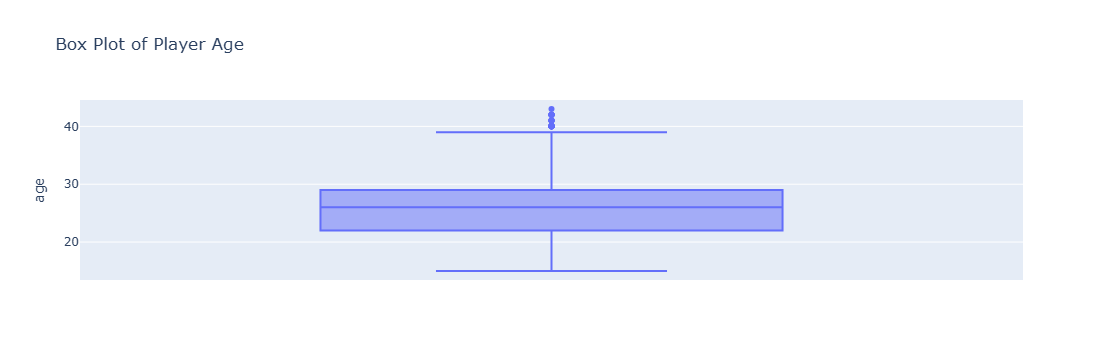

In [437]:
# check outliers
fig = px.box(df, y='age', title="Box Plot of Player Age")

# Show the plot
fig.show() # I will consider 40 as outlier

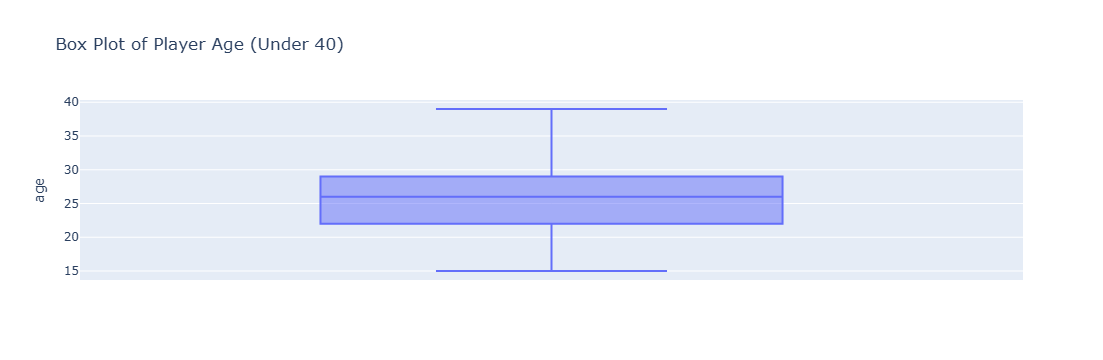

In [438]:
df_filtered = df[df['age'] < 40]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='age', title="Box Plot of Player Age (Under 40)")

# Show the plot
fig.show()

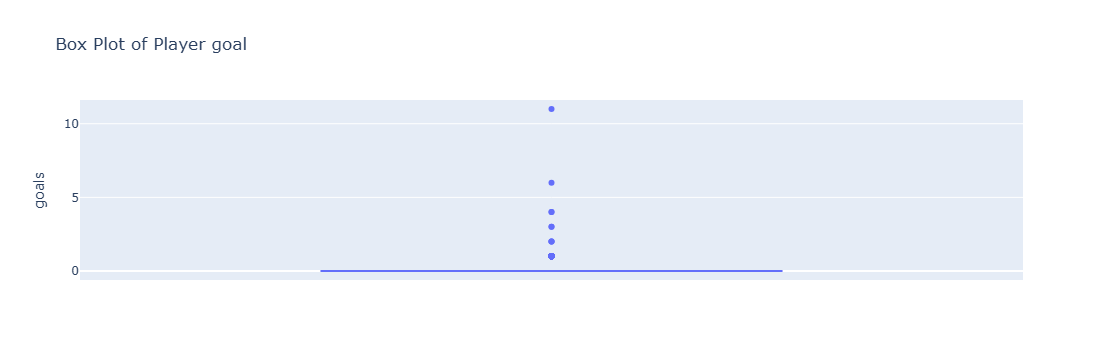

In [441]:
# check outliers
fig = px.box(df, y='goals', title="Box Plot of Player goal")

# Show the plot
fig.show() 

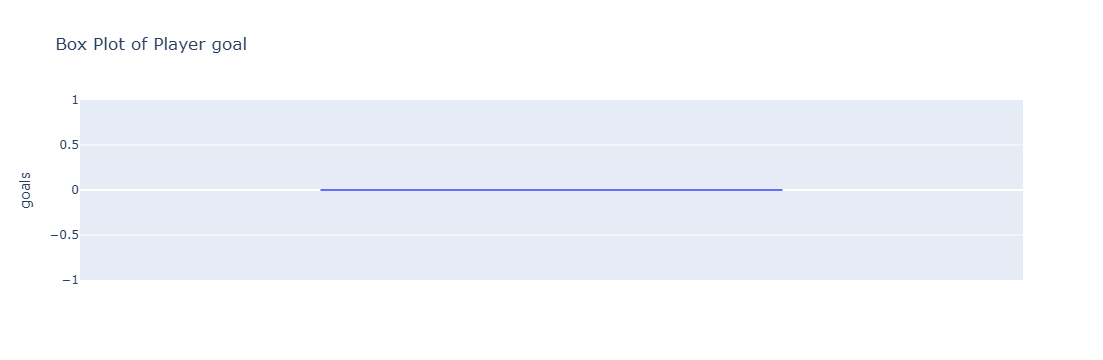

In [442]:
df_filtered = df[df['goals'] <1]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='goals', title="Box Plot of Player goal ")

# Show the plot
fig.show()

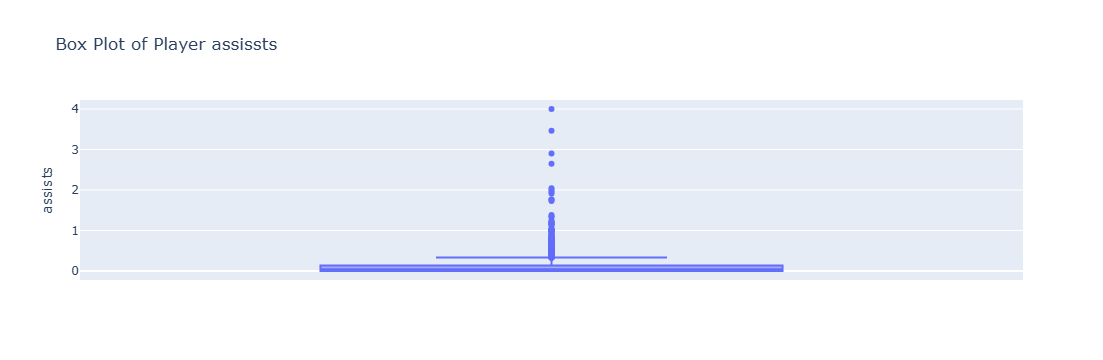

In [443]:
# check outliers
fig = px.box(df, y='assists', title="Box Plot of Player assissts")

# Show the plot
fig.show() 

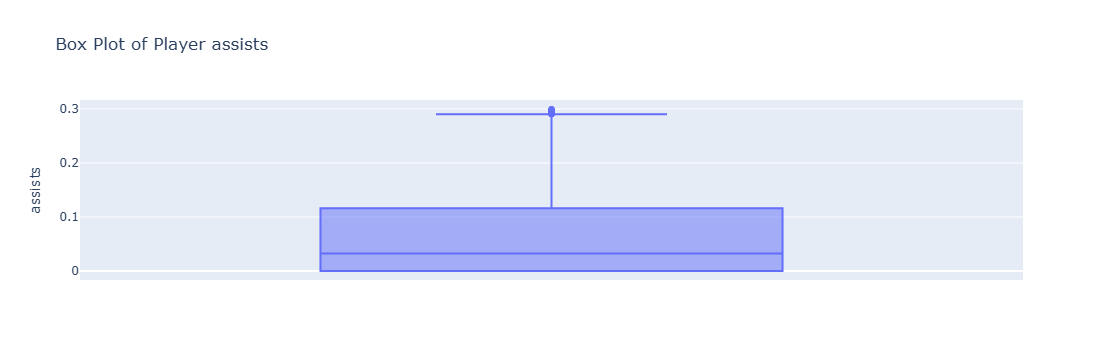

In [446]:
df_filtered = df[df['assists'] <.3]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='assists', title="Box Plot of Player assists ")

# Show the plot
fig.show()

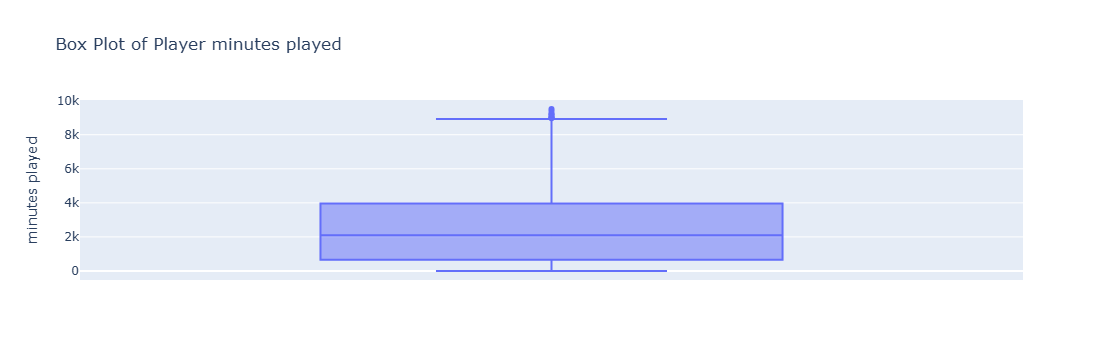

In [449]:
# check outliers
fig = px.box(df, y='minutes played', title="Box Plot of Player minutes played")

# Show the plot
fig.show() 

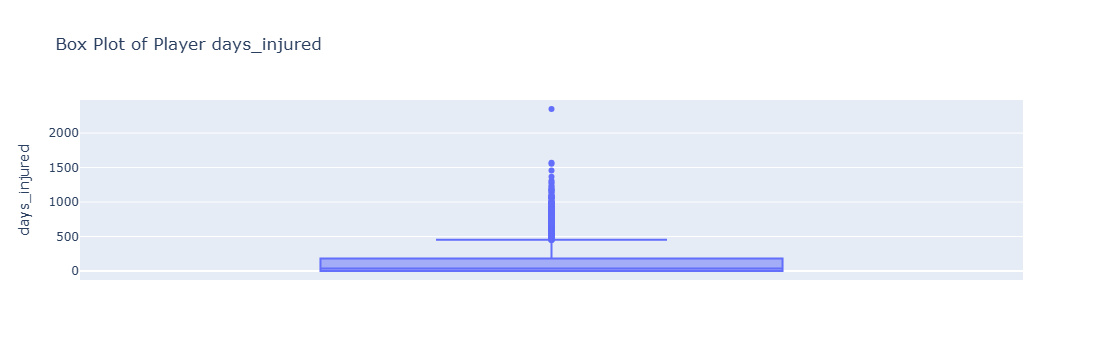

In [451]:
# check outliers
fig = px.box(df, y='days_injured', title="Box Plot of Player days_injured")

# Show the plot
fig.show() 

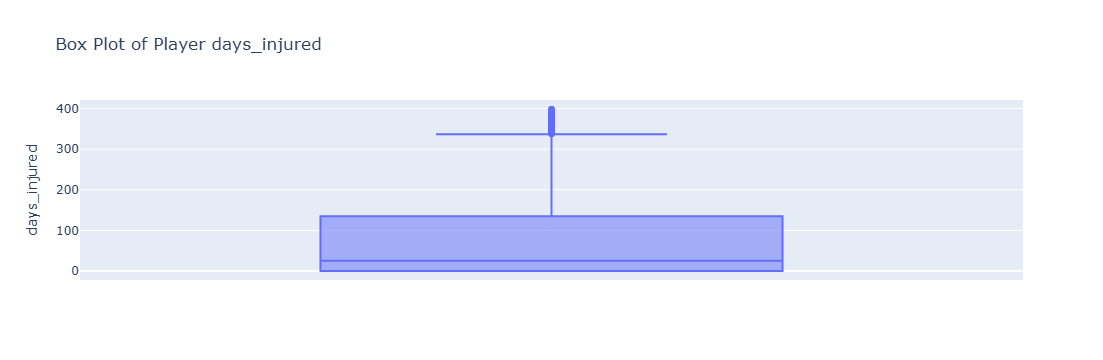

In [453]:
df_filtered = df[df['days_injured'] <400]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='days_injured', title="Box Plot of Player days_injured ")

# Show the plot
fig.show()

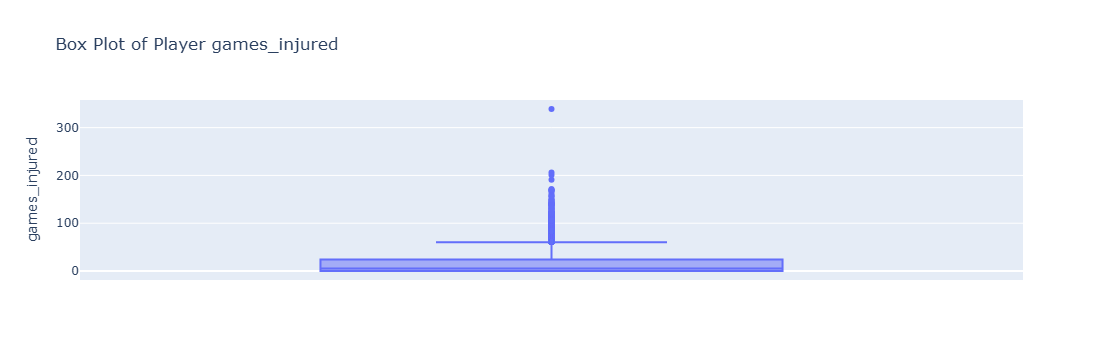

In [455]:
# check outliers
fig = px.box(df, y='games_injured', title="Box Plot of Player games_injured")

# Show the plot
fig.show() 

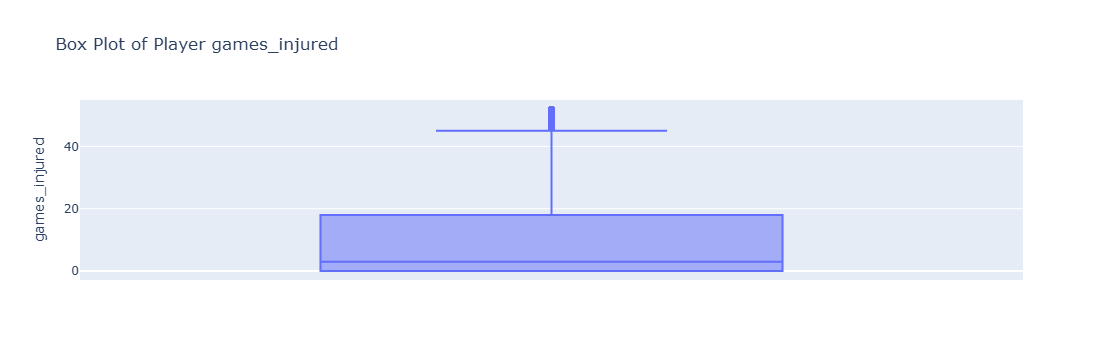

In [457]:
df_filtered = df[df['games_injured'] <53]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='games_injured', title="Box Plot of Player games_injured ")

# Show the plot
fig.show()

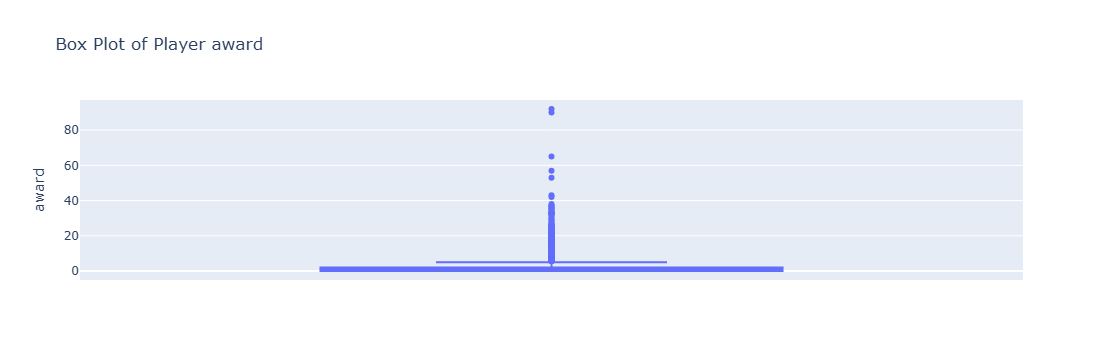

In [459]:
# check outliers
fig = px.box(df, y='award', title="Box Plot of Player award")

# Show the plot
fig.show() 

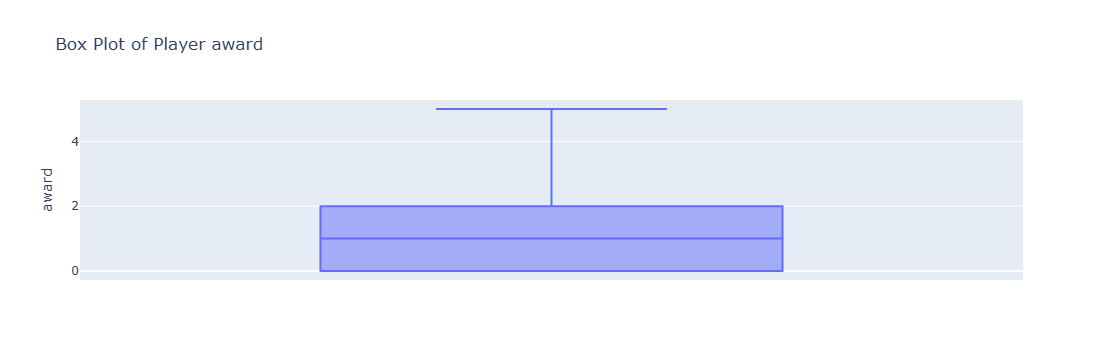

In [461]:
df_filtered = df[df['award'] <6]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='award', title="Box Plot of Player award ")

# Show the plot
fig.show()

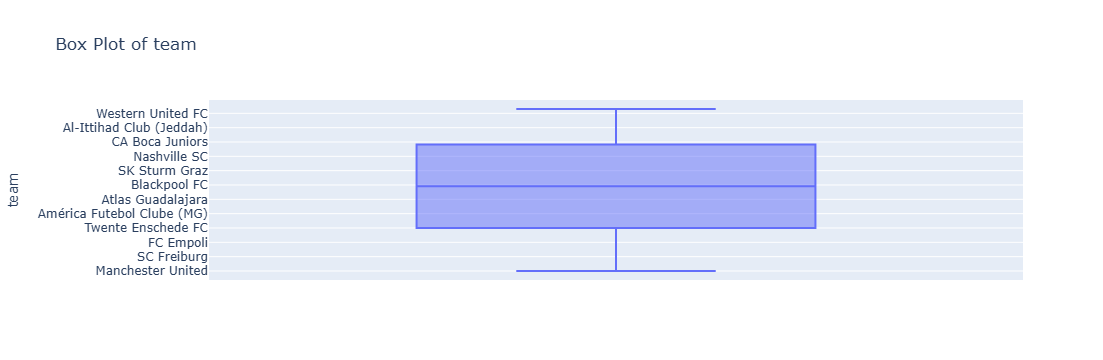

In [463]:
# check outliers
fig = px.box(df, y='team', title="Box Plot of team")

# Show the plot
fig.show() 

### Predicting Current Player Value (current_value) as category values 
#### Dependent Variable: current_value
#### Independent Variables: age, goals, assists, minutes played, days_injured, games_injured, award, team

##### 1. Before we start feeding the model with data , we want to check the selected independent features correlations, and ommit any feature that is highly correlated to another one 

In [467]:
df.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  int32  
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

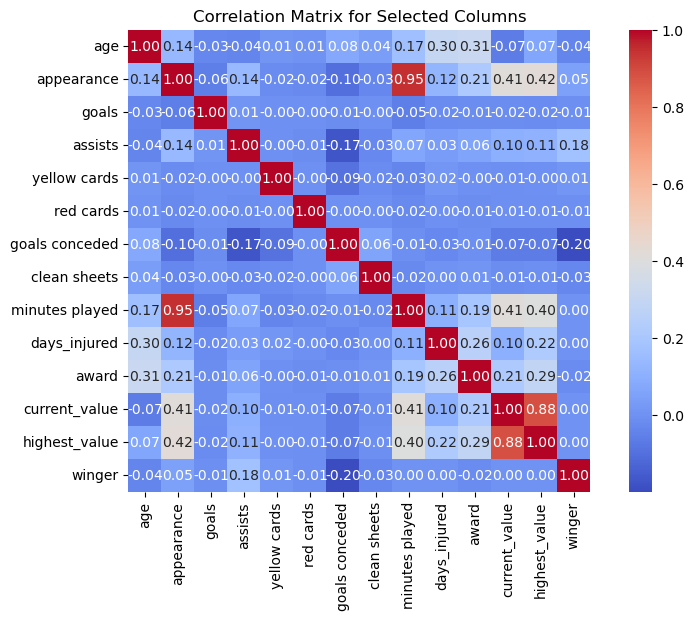

In [471]:
df=df_filtered
# Specify the columns for correlation
columns_of_interest = [ 'age', 'appearance',
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'current_value', 'highest_value',
        'winger']  

# Calculate correlation only for specified columns
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

In [472]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

##### game_injured is highly correlated with days_injured so we will take only one of them 
##### we should considered highe

In [476]:
df_filtered=df_filtered.copy()






In [478]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [480]:



# Define the independent variables (X) again before scaling
X = df_filtered[['age', 
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'highest_value','current_value',
        'winger'] + 
               [col for col in df_filtered.columns if 'team_' in col]]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the independent variables and transform them
#X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [482]:
X.shape

(9720, 13)

In [484]:
X.head(2)

age    goals   assists  yellow cards  red cards  goals conceded  \
0  0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1  2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   

   clean sheets  minutes played  days_injured     award  highest_value  \
0      0.167342       -0.539444      2.399917 -0.043771       1.965971   
1      0.907557       -1.052932      3.510301  2.149277       0.175597   

   current_value    winger  
0      -0.205322 -0.672505  
1      -0.336822 -0.672505

### -----------------------------------------Start DBSCAN model---------------------------------------------

###### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups data points based on density. Unlike K-Means, which requires you to specify the number of clusters in advance, DBSCAN automatically finds clusters based on two main parameters: epsilon (ε) and min_samples.

##### Advantages of DBSCAN
###### No need to specify the number of clusters in advance (unlike K-Means).
###### Can find clusters of arbitrary shapes since it relies on density, not spherical distances.
###### Identifies noise (outliers), which can be useful in data cleaning.
##### Limitations of DBSCAN
###### Parameter sensitivity: The choice of ε and min_samples greatly affects the results. It may require tuning based on the data.
###### Not ideal for varying density clusters: DBSCAN struggles with datasets where clusters have different densities, as a single ε may not fit all clusters.

In [488]:
# . One common approach is to use the k-nearest neighbors algorithm to estimate the optimal eps
min_samples = 2 # means that a point must have at least two points (itself and one other point) in its neighborhood 

In [490]:
# Step 1: Initialize the NearestNeighbors model
# This model will help us find the closest `min_samples` neighbors for each point in the dataset.
nn = NearestNeighbors(n_neighbors=min_samples)

# Step 2: Fit the model to the dataset X
# Here, `X` is our dataset of points
# By fitting, we train the NearestNeighbors model on X so it can find neighbors for each point.
nn.fit(X)

# Step 3: Calculate the distances to the nearest neighbors for each point in X
# This step returns two outputs:
# - `distances`: A 2D array where each row contains distances to the nearest `min_samples` neighbors for a given point.
# - `indices`: A 2D array where each row contains the indices (positions) of the nearest neighbors for each point in X.
distances, indices = nn.kneighbors(X)

In [492]:
distances[:,min_samples-1]


array([2.05620841, 1.96456992, 1.54188515, ..., 0.16389515, 0.299429  ,
       0.19357454])

##### plot these distances to determine eps

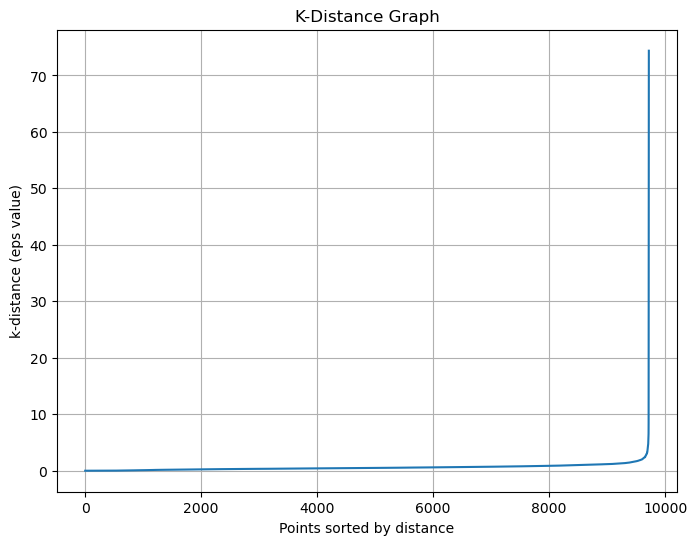

In [495]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

##### Interpreting the Plot
##### Flat Region: At the beginning of the plot (lower distances), we see a relatively flat line. This region represents points that are closely packed together, likely forming dense clusters.
##### Elbow Point: Around the point where the curve sharply increases (toward the right end), there’s a clear "elbow." This point suggests a transition from densely packed points to points that are more isolated or belong to the cluster boundaries.
##### Selecting eps: The eps value should generally be chosen around this elbow point, just before the sharp rise in distance values. This will help include the dense regions in clusters while excluding points that are far from any dense region (potentially noise).

##### Looking at the plot, We will set eps to the approximate y-value at the elbow point, where the curve begins to rise sharply. If, for example, the elbow starts around a distance of 10 on the y-axis, then eps = 4 could be a suitable choice for your DBSCAN model.

In [499]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 4 # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [501]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X)


In [511]:
# calculate and display the frequency of each unique value in a clusters list or array
pd.Series(clusters).value_counts()


 0    9643
 1      43
-1      20
 3       3
 4       3
 2       2
 5       2
 6       2
 7       2
Name: count, dtype: int64

##### Cluster 0 (9643 data points): The majority of data points fall into cluster 0. This cluster is significantly larger than the others, which suggests that the clustering algorithm has assigned most points to it. In clustering, such a large cluster may indicate that data points in this cluster share common characteristics but are not well separated from one another.

##### Clusters 1 and -1 (43 and 20 data points, respectively): These clusters contain relatively few points. Cluster -1 often represents "noise" or "outliers" in some clustering algorithms (such as DBSCAN). This suggests there may be a small amount of data that doesn’t fit well within the main clusters.

##### Clusters 2, 3, 4, 5, 6, and 7 (2-3 data points each): These clusters are extremely small, containing only 2 or 3 points each. Tiny clusters like these could indicate isolated data points that form their own group due to unique characteristics, or they could be outliers.

#### -------------------------------------------------Evaluate the Model ----------------------------------------------

In [516]:
from sklearn.metrics import silhouette_score
# calculates the average silhouette score for a clustering solution, which helps to assess how well-defined the clusters are.
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.5053664325907223

#####  0.505 silhouette score indicates reasonably good clustering but suggests that some refinement might enhance cluster quality.

In [520]:
X.head(2)


age    goals   assists  yellow cards  red cards  goals conceded  \
0  0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1  2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   

   clean sheets  minutes played  days_injured     award  highest_value  \
0      0.167342       -0.539444      2.399917 -0.043771       1.965971   
1      0.907557       -1.052932      3.510301  2.149277       0.175597   

   current_value    winger  
0      -0.205322 -0.672505  
1      -0.336822 -0.672505

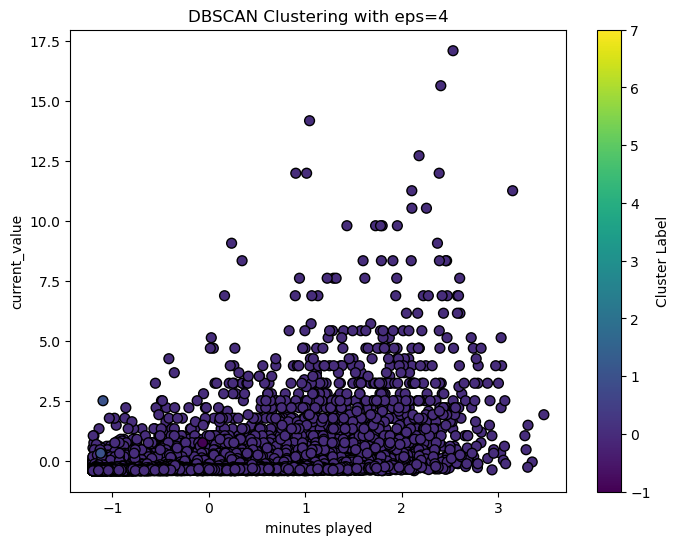

In [522]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(data=X,x='minutes played', y='current_value', c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('minutes played')
plt.ylabel('current_value')
plt.colorbar(label='Cluster Label')
plt.show()

##### Observations:
##### Dense Cluster at the Bottom Left: Most data points are concentrated in the lower region of the plot with low minutes played and low current_value. This region is densely packed and appears to contain the majority of points in a single cluster.

##### Smaller Clusters and Outliers:

##### There are a few scattered points with higher current_value and minutes played, which are likely separated into different clusters or identified as noise/outliers by DBSCAN.
##### Some points have a color corresponding to small clusters (like clusters 3, 4, 5, etc.), indicating they are relatively isolated.
###### Cluster -1 (Noise): Points labeled as -1 are noise points or outliers, as assigned by DBSCAN. These points did not fit well into any cluster based on the chosen eps value.

In [525]:
# add the cluster labels (clusters) from the DBSCAN clustering algorithm as a new column named 'dbscan' in the X DataFrame.
X['dbscan'] = clusters


In [527]:
X['dbscan'].value_counts()


dbscan
 0    9643
 1      43
-1      20
 3       3
 4       3
 2       2
 5       2
 6       2
 7       2
Name: count, dtype: int64

<Axes: xlabel='minutes played', ylabel='current_value'>

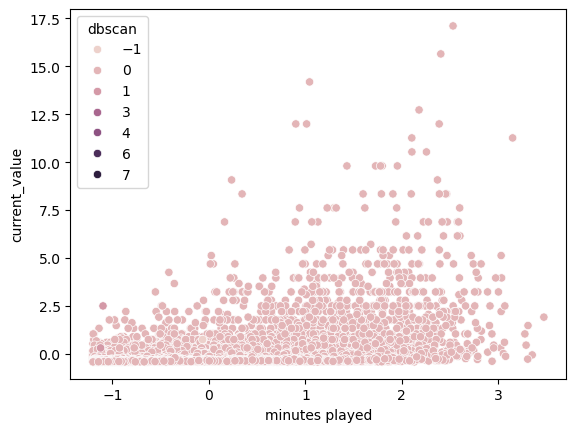

In [529]:
sns.scatterplot(data = X , x = 'minutes played', y = 'current_value', hue = 'dbscan')


<Axes: xlabel='age', ylabel='current_value'>

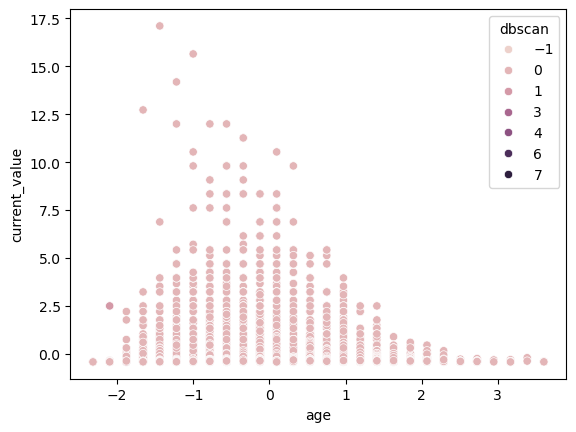

In [531]:
sns.scatterplot(data = X , x = 'age', y = 'current_value', hue = 'dbscan')


##### Clusters & Noise:

##### The plot shows different shades for clusters, with cluster -1 representing noise points (those that DBSCAN couldn’t assign to any cluster).
##### It seems that most of the points belong to the main clusters (0, 1) with a few other clusters (3, 4, 6, 7) containing a small number of points.
##### Distribution:

##### The majority of points with higher current_value appear to cluster near the center, while there’s a spread in the age dimension.
##### This indicates that players’ current_value might not vary much with age alone, which suggests that current_value could be influenced by other features as well.

<Axes: xlabel='days_injured', ylabel='current_value'>

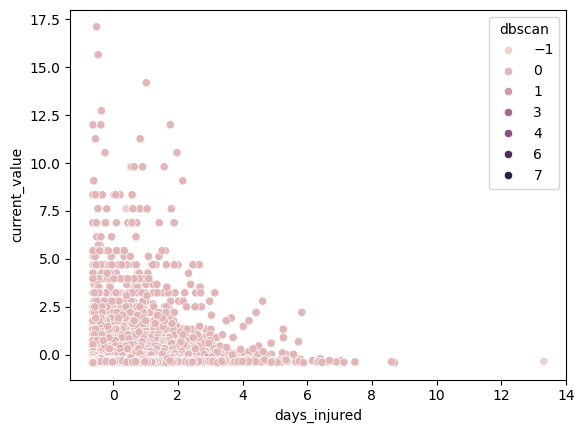

In [532]:
sns.scatterplot(data = X , x = 'days_injured', y = 'current_value', hue = 'dbscan')


<Axes: xlabel='red cards', ylabel='current_value'>

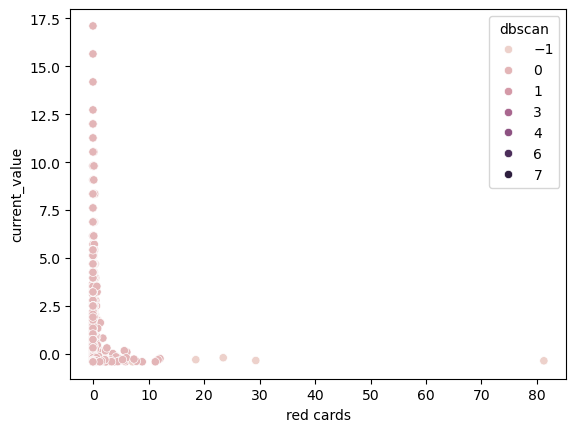

In [535]:
	
sns.scatterplot(data = X , x = 'red cards', y = 'current_value', hue = 'dbscan')
